# Prelim ARIMA Retro. Analysis

## notes

###### **pageviews only:**

- pick pageid(s)
- get daily views series for 2 years
- regress pageviews ~ weekends, holidays, linear trend:
    - get residuals RS_VIEWS
- lag RS_VIEWS to get RS_VIEWS_L!, L2, etc.
- regress RS_VIEWS on:
    - a naive moving average of RS_VIEWS lags
    - and some AR lags of RS_VIEWS
- do ARIMA analysis of pageviews to compare

#### later

###### **edits only:**

same thing

###### **pageviews and edits:**

- regress RS_EDITS on RS_VIEWS_L1
- regress RS_EDITS on RS_EDITS_LX and RS_VIEWS_LX

## setup

In [66]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
# import statsmodels.api as sm_api

In [29]:
from sklearn.datasets import make_blobs

In [ ]:
# # PLOT CENTERS
# ax = plt.subplot()
# ax.scatter(x = centers[:,0], y = centers[:,1])
# ax.set_xlim(-window, window)
# ax.set_ylim(-window, window)



(-20.0, 20.0)

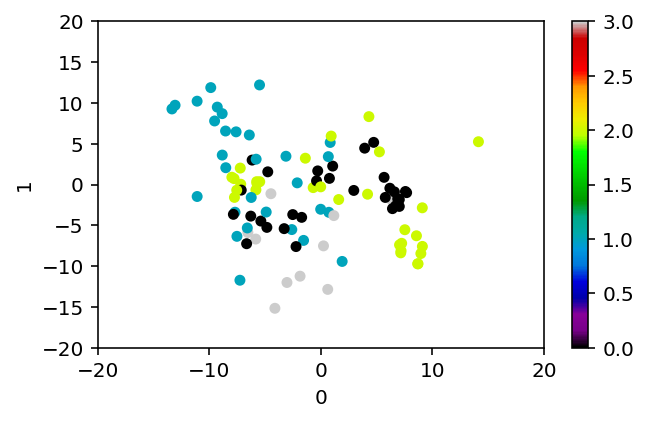

In [797]:
window = 20
centers_num = 10
centers_cov = np.diag(np.ones(2)*25) # σx = σy = 5
clus_centers = np.random.multivariate_normal(mean=(0,0), cov=centers_cov, size=centers_num)
clus_std = np.random.random(size=centers_num)*4 + 1
X, y0 = make_blobs(n_samples=100, n_features=2, 
                   centers=clus_centers, cluster_std=clus_std,
                   random_state=0, shuffle=True)
y = np.array([int(i//3) for i in y0])

# PLOT BLOBS
fig = plt.figure(figsize=(5,3))
ax = plt.subplot()
X = pd.DataFrame(X)
X.plot.scatter(x=0, y=1, ax=ax, c=y, cmap='nipy_spectral')
ax.set_xlim(-window,window)
ax.set_ylim(-window,window)

In [737]:
y0

array([1, 9, 2, 9, 8, 1, 3, 6, 4, 2, 8, 3, 6, 7, 9, 0, 7, 5, 6, 6,
       6, 2, 4, 3, 4, 1, 4, 0, 4, 5, 1, 1, 5, 9, 9, 8, 9, 3, 8, 7,
       1, 7, 7, 8, 6, 0, 4, 0, 4, 6, 1, 3, 1, 0, 0, 9, 4, 8, 8, 8,
       6, 5, 5, 5, 3, 2, 2, 7, 5, 2, 2, 5, 3, 9, 0, 2, 2, 5, 1, 6,
       6, 7, 8, 0, 9, 7, 2, 8, 0, 9, 0, 3, 3, 7, 1, 4, 7, 4, 5, 3])